# Titanic: Machine Learning from Disaster
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we are tasked to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to create a binary classification model capable of predicting which passengers survived the tragedy.

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data Exploration and Preparation for Models

In [2]:
df = pd.read_csv(os.path.join('source_data', 'train.csv'))  # data frame of training data supplied by kaggle
df.head()  # first five rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isna().any()  # Review Columns (Features) Available and Discover if any information is missing

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Data Dictionary
<ol>
    <li><b>PassengerId</b>: 	Passenger unique ID, useful for submission of solution</li>
    <li><b>Survived</b>: 	Binary value for survived:	0 = No, 1 = Yes</li>
    <li><b>Pclass</b>: 	 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd</li>
    <li><b>Sex</b>: Passenger's Sex</li>
    <li><b>Age</b>: 	 	Passenger's Age in years 	</li>
    <li><b>SibSp</b>: 	 	# of siblings / spouses aboard the Titanic 	</li>
    <li><b>Parch</b>: 	 	# of parents / children aboard the Titanic 	</li>
    <li><b>Ticket</b>: 	 	Ticket number 	</li>
    <li><b>Fare</b>: 	 	Passenger fare 	</li>
    <li><b>Cabin</b>: 	 	Cabin number 	</li>
    <li><b>Embarked</b>: 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton</li>
</ol>

In this analysis we will be leveraging the background information that women, children, and the upper-class were more likey to survive. In this case we will be carrying forward the features of Pclass, Sex, and Age to develop a classification model along with the feature of Survived which is our target label. 

While Fare may also be useful with ascertaining finer resolution on a passenger's socio-economic class, we will set that aside for this initial investigation.

Sex is a useful feature but currently populated with "male" and "female" strings, a column of codified data will have to be created.

Age was a feature also recognized for having null values present. We will investigate the effects of imputing null Age values with median Age as well as the effects of dropping this rows from training altogether.

Lastly, the feature PassengerId will also be preserved as it is an inportant feature for the logistics of the competition submission.

In [5]:
features = ["Pclass","Sex","Age"]
labels = ["Survived"]
features_to_remove = ["SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df.drop(features_to_remove, axis=1, inplace=True) 

In [6]:
sex_mapping = {'male': 0, 'female': 1}  # Codify and map Sex strings to integer values
df['Sex'] = df['Sex'].map(sex_mapping)

In [7]:
df["Age"].fillna(28.0, inplace=True)  # Replace null data in Age column with the median Age = 28.0
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
dtype: bool

/home/jeffrey/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


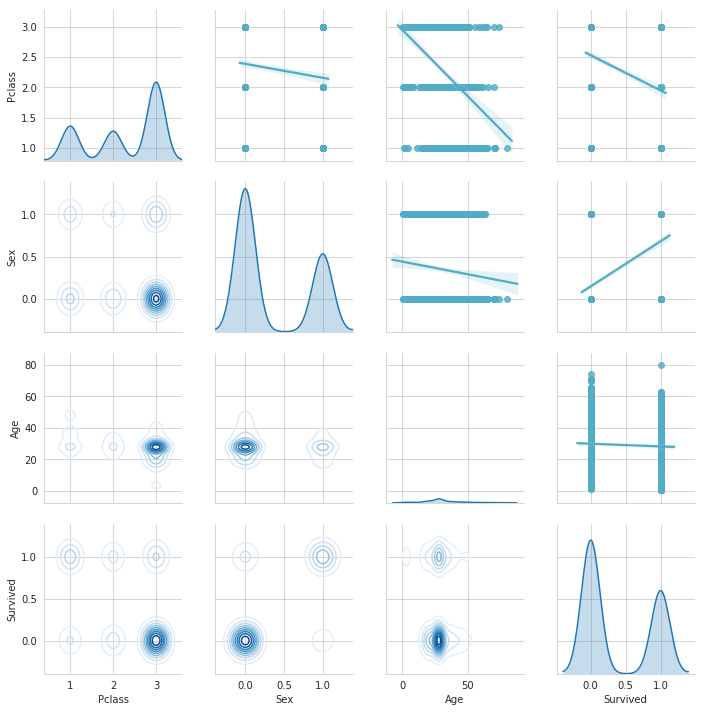

In [8]:
sns.set_style("whitegrid")
g = sns.PairGrid(df[features + labels])  # Create a Pair Grid Instance
g.map_upper(sns.regplot, color="#51ACC5")
g.map_diag(sns.kdeplot, legend=False, shade=True)
g.map_lower(sns.kdeplot, shade=False, cmap="Blues")

#### Data Observations from Pair Grid

<ul>
    <li>There were approximately 1.5 times more third-class passengers than first or second class passengers. </li>
    <li>A high percentage of those third-class passengers were men.</li>
    <li>First class passengers skew slightly older than other classes.</li>
    <li>First-class passengers were more likely to survive than die in the tragedy. while third-class passengers had a noticeably low survival rate. </li>
    <li>More women survived than perished while it appears a very low percentage of men survived</li>
    <li>Survival tied to Age is relatively flat but it does appear than some small bias exists that shows favorable survival rates to younger passengers</li>
    </ul>
    
                

## Prototype and Fine Tune Promising Models
This project aims to solve a binary classification problem - given a Titanic passenger's Survival based on their Sex, Age, and Class. 

For this initial investigation, the following two classification models will be explored:
<ul><li>k Nearest Neighbors Classifier</li>
    <li>Support Vector Machine</li>
    </ul>
    
There are other classification models that may or may not be well suited to this problem that could be considered later:
<ul><li>Logistic Regression Classifier</li>
    <li>Decision Trees</li>
    <li>Random Forest</li>
    <li>Naive Bayes</li>
    <li>Neural Networks</li></ul>

### k Nearest Neighbors Classifier

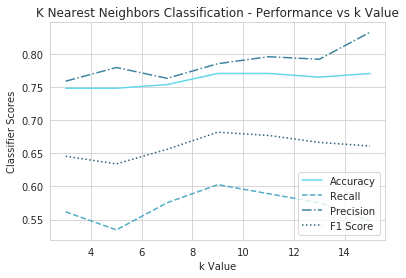

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

normalized_features = normalize(df[features], axis=0)

x_train, x_test, y_train, y_test = train_test_split(normalized_features, df[labels], train_size=0.8, test_size=0.2, random_state=1)

k_range = list(range(3,17,2))
m_accuracy = []
m_recall = []
m_precision = []
m_f1 = []
    
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)  # Instantiate the Model
    classifier.fit(x_train, y_train.values.ravel())  # Fit or Train the Model
    y_predicted = classifier.predict(x_test)  # Make Predictions on the Test subset
    m_accuracy.append(accuracy_score(y_test, y_predicted))
    m_recall.append(recall_score(y_test, y_predicted))
    m_precision.append(precision_score(y_test, y_predicted))
    m_f1.append(f1_score(y_test, y_predicted))
    
plot_labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
blues = ["#66D7EB", "#51ACC5", "#3E849E", "#2C5F78", "#1C3D52", "#0E1E2B"]
plt.plot(k_range, m_accuracy, '-', label=plot_labels[0], color=blues[0])
plt.plot(k_range, m_recall, '--', label=plot_labels[1], color=blues[1])
plt.plot(k_range, m_precision, '-.', label=plot_labels[2], color=blues[2])
plt.plot(k_range, m_f1, ':', label=plot_labels[3], color=blues[3])
plt.legend(loc='lower right')
plt.title('K Nearest Neighbors Classification - Performance vs k Value')
plt.xlabel('k Value')
plt.ylabel('Classifier Scores')
plt.show()

In [10]:
m_accuracy[3]  # Performance peaks for a reasonable k = 9

0.770949720670391

### Support Vector Machine

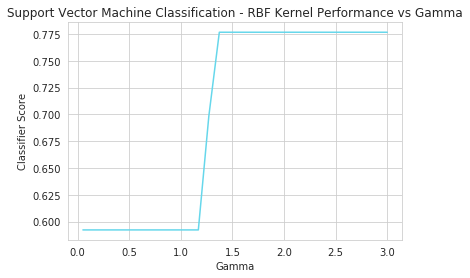

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.svm import SVC

normalized_features = normalize(df[features], axis=0)

x_train, x_test, y_train, y_test = train_test_split(normalized_features, df[labels], train_size=0.8, test_size=0.2, random_state=1)

gamma_range = np.linspace(0.05, 3.0, num=30)
kernel_value = "rbf"
scores = []
m_recall = []
m_precision = []
m_f1 = []

for gamma_value in gamma_range:
    classifier = SVC(kernel=kernel_value, gamma=gamma_value)  # Instantiate the Model
    classifier.fit(x_train, y_train.values.ravel())  # Fit or Train the Model
    scores.append(classifier.score(x_test, y_test))
blues = ["#66D7EB", "#51ACC5", "#3E849E", "#2C5F78", "#1C3D52", "#0E1E2B"]
plt.plot(gamma_range, scores, '-', label='gamma', color=blues[0])
plt.title('Support Vector Machine Classification - RBF Kernel Performance vs Gamma')
plt.xlabel('Gamma')
plt.ylabel('Classifier Score')
plt.show()

In [12]:
print("Classifier model score plateaus at "+str(scores[13])+" when gamma >= "+str(gamma_range[13]))

Classifier model score plateaus at 0.776536312849162 when gamma >= 1.3724137931034484


## Load Test Data and Generate Predictions

Use our trained and optimized models to predict suvival for passengers in the "test.csv". Compare the outputs of the two model predictors.

### Create Fine-Tuned Classification Models

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

normalized_features = normalize(df[features], axis=0)
x_train, x_test, y_train, y_test = train_test_split(normalized_features, df[labels], train_size=0.90, test_size=0.10, random_state=1)

knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(x_train, y_train.values.ravel())  # Fit or Train the Model
y_predicted = knn_classifier.predict(x_test)  # Make Predictions on the Test subset
print(accuracy_score(y_test, y_predicted))

svm_classifier = SVC(kernel="rbf", gamma=1.3724)  
svm_classifier.fit(x_train, y_train.values.ravel())  # Fit or Train the Model
print(svm_classifier.score(x_test, y_test))

0.7777777777777778
0.7333333333333333


### Load Test Data and Prepare it for Input to Model

In [14]:
test_df = pd.read_csv(os.path.join('source_data', 'test.csv'))  # Read in the Test data supplied by kaggle
test_df.head()  # same as train.csv except for the missing Survived column

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
features = ["Pclass","Sex","Age"]
labels = ["Survived"]
features_to_remove = ["SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
test_df.drop(features_to_remove, axis=1, inplace=True) 

sex_mapping = {'male': 0, 'female': 1}  # Codify and map Sex strings to integer values
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

test_df["Age"].fillna(28.0, inplace=True)  # Replace null data in Age column with the median Age = 28.0

normalized_test_features = normalize(test_df[features], axis=0)

In [16]:
test_df["knn_predicted"] = knn_classifier.predict(normalized_test_features)
test_df["svm_predicted"] = svm_classifier.predict(normalized_test_features)

In [17]:
print(test_df['knn_predicted'].value_counts() / len(test_df))
print(test_df['svm_predicted'].value_counts() / len(test_df))

0    0.782297
1    0.217703
Name: knn_predicted, dtype: float64
0    0.636364
1    0.363636
Name: svm_predicted, dtype: float64


In [18]:
o_k = open("knn_submission.csv", "w+")
o_s = open("svm_submission.csv", "w+")

o_k.write("PassengerId,Survived\n")
o_s.write("PassengerId,Survived\n")

for index, row in test_df.iterrows():
    o_k.write(str(row["PassengerId"])+","+str(row["knn_predicted"])+'\n')
    o_s.write(str(row["PassengerId"])+","+str(row["svm_predicted"])+'\n')

o_k.close()
o_s.close()

The competition scored my results as follows:
<ol><li><b>SVM Classifier</b>: 0.76555</li>
    <li><b>kNN Classifier</b>: 0.74162</li></ol>